# Sazionaliade

In [1]:
! pip install prophet==1.1.5 plotly

In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet

CSV_BR_LAND_TEMP = './data/processed/brazil_land_temp.csv'

df_br = pd.read_csv(CSV_BR_LAND_TEMP)

df_br.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month
0,1832-01-01,24.935,1.372,Brazil,1
1,1832-02-01,24.505,1.953,Brazil,2
2,1832-03-01,24.617,1.359,Brazil,3
3,1832-04-01,23.990,2.013,Brazil,4
4,1832-05-01,23.124,1.592,Brazil,5


In [3]:
df_train = pd.DataFrame()

df_train['ds'] = df_br.loc[:2000 - 1, 'dt']
df_train['y'] = df_br.loc[:2000 - 1, 'AverageTemperature']

print(df_train.shape)
df_train.head()

(2000, 2)


,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


> "A sazonalidade aditiva é quando a série
> apresenta flutuações sazonais mais ou menos constantes, não
> importando o nível global da série. Enquanto isso, a sazonalidade
> multiplicativa ocorre quando o tamanho das flutuações sazonais
> varia dependendo do nível global da série." pg. 50

In [5]:
model = Prophet(seasonality_mode='additive') # default

model.fit(df_train)

df_future = model.make_future_dataframe(periods=0)

predicions = model.predict(df_future)

predicions.head()

17:03:13 - cmdstanpy - INFO - Chain [1] start processing
17:03:14 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,23.959367,24.024472,25.136825,23.959367,23.959367,0.607761,0.607761,0.607761,0.607761,0.607761,0.607761,0.0,0.0,0.0,24.567128
1,1832-02-01,23.960482,23.995159,25.137088,23.960482,23.960482,0.591749,0.591749,0.591749,0.591749,0.591749,0.591749,0.0,0.0,0.0,24.552231
2,1832-03-01,23.961524,23.760698,24.873855,23.961524,23.961524,0.369199,0.369199,0.369199,0.369199,0.369199,0.369199,0.0,0.0,0.0,24.330724
3,1832-04-01,23.962639,23.198177,24.377692,23.962639,23.962639,-0.147005,-0.147005,-0.147005,-0.147005,-0.147005,-0.147005,0.0,0.0,0.0,23.815634
4,1832-05-01,23.963718,22.620253,23.753490,23.963718,23.963718,-0.783976,-0.783976,-0.783976,-0.783976,-0.783976,-0.783976,0.0,0.0,0.0,23.179742


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Temperatura')

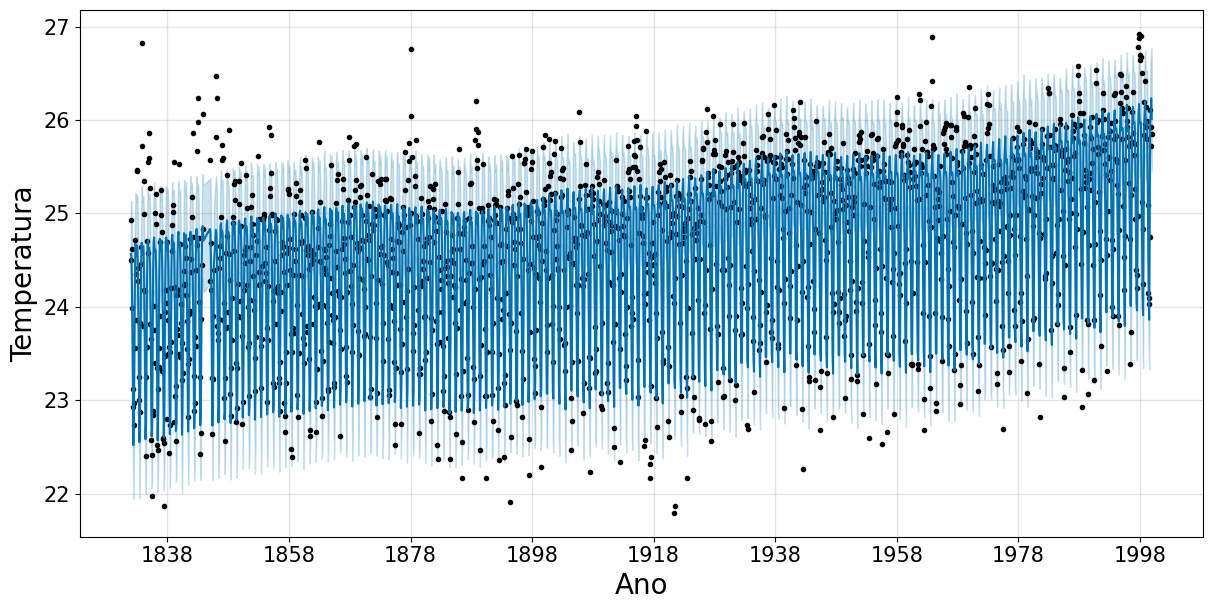

In [7]:
model.plot(predicions, figsize=(12, 6))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura', fontsize=20)

In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_train['y'], predicions['yhat'][:2000])

0.19726389542692552

In [9]:
model = Prophet(seasonality_mode='multiplicative')

model.fit(df_train)

df_future = model.make_future_dataframe(periods=0)

predicions = model.predict(df_future)

predicions.head()

17:06:33 - cmdstanpy - INFO - Chain [1] start processing
17:06:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1832-01-01,23.961494,23.984503,25.150279,23.961494,23.961494,0.024649,0.024649,0.024649,0.024649,0.024649,0.024649,0.0,0.0,0.0,24.552109
1,1832-02-01,23.962559,23.957250,25.119783,23.962559,23.962559,0.024027,0.024027,0.024027,0.024027,0.024027,0.024027,0.0,0.0,0.0,24.538312
2,1832-03-01,23.963556,23.768618,24.934349,23.963556,23.963556,0.015200,0.015200,0.015200,0.015200,0.015200,0.015200,0.0,0.0,0.0,24.327791
3,1832-04-01,23.964622,23.264584,24.390097,23.964622,23.964622,-0.005718,-0.005718,-0.005718,-0.005718,-0.005718,-0.005718,0.0,0.0,0.0,23.827584
4,1832-05-01,23.965653,22.614727,23.762607,23.965653,23.965653,-0.031749,-0.031749,-0.031749,-0.031749,-0.031749,-0.031749,0.0,0.0,0.0,23.204759


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Temperatura')

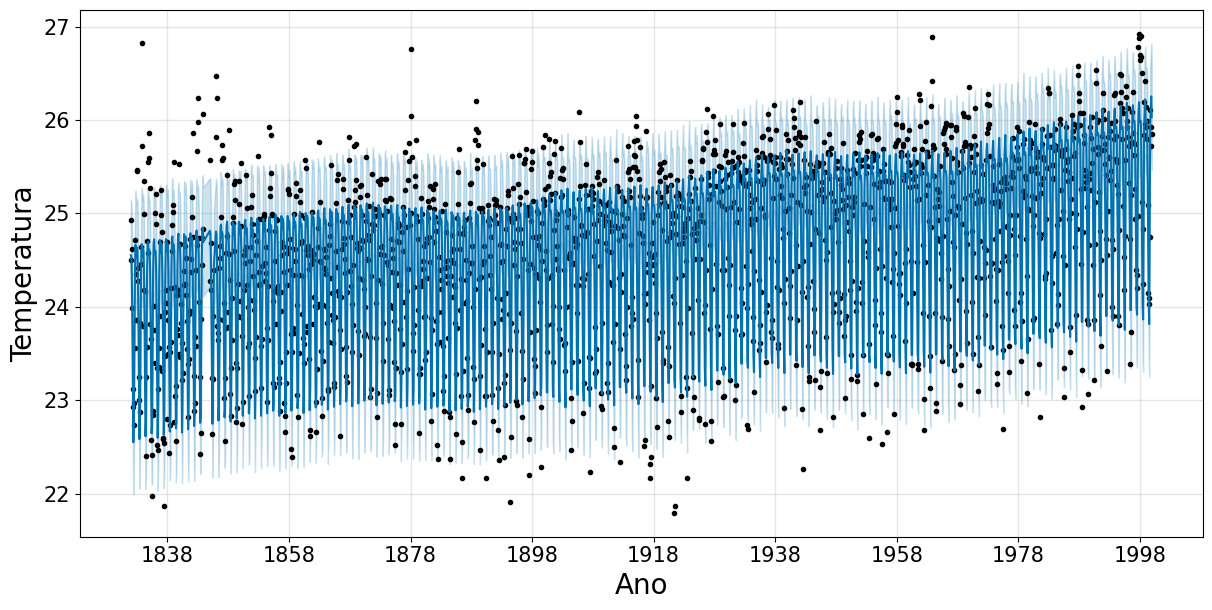

In [10]:
model.plot(predicions, figsize=(12, 6))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura', fontsize=20)

In [11]:
mean_squared_error(df_train['y'], predicions.loc[:1999, 'yhat'])

0.19710792608222677

## Sazonalidade aditiva e multiplicativa

In [12]:
CSV_URL_ANTIDIABETIC_DRUG = 'https://github.com/allanspadini/livro-val-allan/blob/main/AusAntidiabeticDrug.csv?raw=true'

df_drug = pd.read_csv(CSV_URL_ANTIDIABETIC_DRUG)

df_drug.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [13]:
model = Prophet(seasonality_mode='additive')

model.fit(df_drug)

df_future = model.make_future_dataframe(periods=36, freq='M')

predicions = model.predict(df_future)

predicions.head()

17:10:16 - cmdstanpy - INFO - Chain [1] start processing
17:10:16 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1991-07-01,3.157195,1.599809,4.166434,3.157195,3.157195,-0.277557,-0.277557,-0.277557,-0.277557,-0.277557,-0.277557,0.0,0.0,0.0,2.879638
1,1991-08-01,3.213570,1.926801,4.570385,3.213570,3.213570,0.053599,0.053599,0.053599,0.053599,0.053599,0.053599,0.0,0.0,0.0,3.267170
2,1991-09-01,3.269946,1.675182,4.263396,3.269946,3.269946,-0.220205,-0.220205,-0.220205,-0.220205,-0.220205,-0.220205,0.0,0.0,0.0,3.049741
3,1991-10-01,3.324503,2.468412,5.141541,3.324503,3.324503,0.440047,0.440047,0.440047,0.440047,0.440047,0.440047,0.0,0.0,0.0,3.764550
4,1991-11-01,3.380879,2.917425,5.545717,3.380879,3.380879,0.772509,0.772509,0.772509,0.772509,0.772509,0.772509,0.0,0.0,0.0,4.153387


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Vendas')

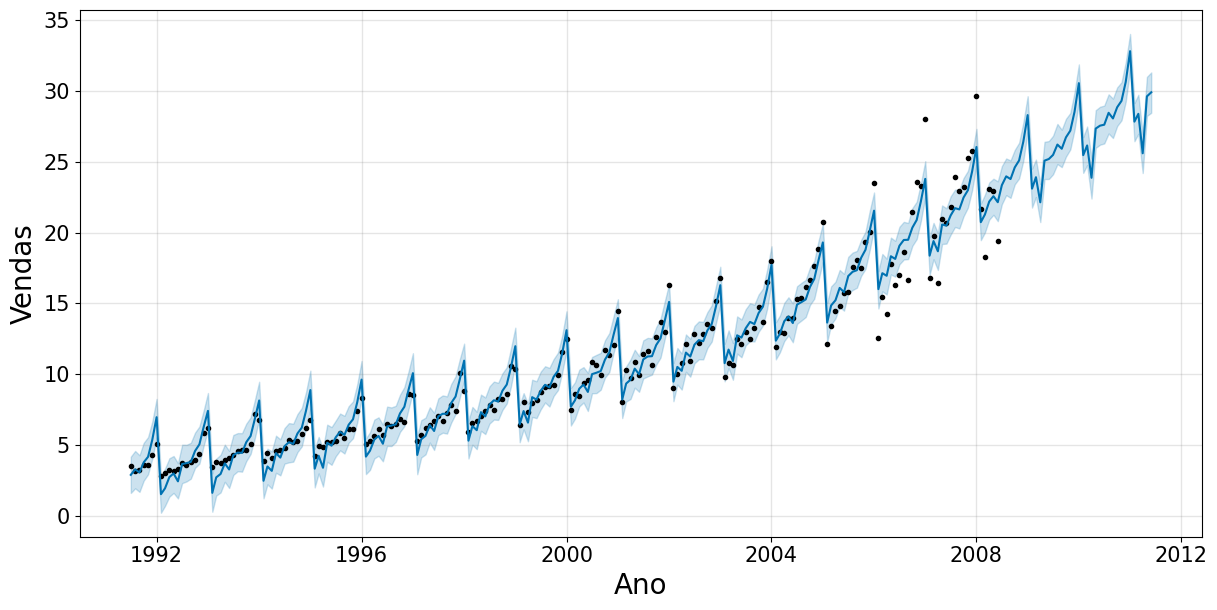

In [14]:
model.plot(predicions, figsize=(12, 6))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Vendas', fontsize=20)

In [15]:
mean_squared_error(df_drug['y'], predicions.loc[:203, 'yhat'])

1.0526097976685875

> "[...] não há uma constância nos dados, e, por isso, não há um ajuste tão bom da curva, após 2004, onde temos grandes oscilações sazonais. A propagação sazonal dos dados está aumentando, mas estamos prevendo que seja constante, já que estamos usando a sazonalidade aditiva aqui. Esse é o erro de escolher a sazonalidade aditiva quando a multiplicativa é necessária. [...]" pg. 55

In [19]:
model = Prophet(seasonality_mode='multiplicative')

model.fit(df_drug)

df_future = model.make_future_dataframe(periods=36, freq='M')

predicions = model.predict(df_future)

predicions.head()

17:14:38 - cmdstanpy - INFO - Chain [1] start processing
17:14:38 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1991-07-01,3.272504,2.311445,4.032616,3.272504,3.272504,-0.039016,-0.039016,-0.039016,-0.039016,-0.039016,-0.039016,0.0,0.0,0.0,3.144823
1,1991-08-01,3.326562,2.511447,4.164828,3.326562,3.326562,0.008228,0.008228,0.008228,0.008228,0.008228,0.008228,0.0,0.0,0.0,3.353932
2,1991-09-01,3.380621,2.484930,4.070897,3.380621,3.380621,-0.024783,-0.024783,-0.024783,-0.024783,-0.024783,-0.024783,0.0,0.0,0.0,3.296839
3,1991-10-01,3.432935,2.705077,4.413190,3.432935,3.432935,0.039864,0.039864,0.039864,0.039864,0.039864,0.039864,0.0,0.0,0.0,3.569787
4,1991-11-01,3.486994,2.984605,4.634895,3.486994,3.486994,0.082441,0.082441,0.082441,0.082441,0.082441,0.082441,0.0,0.0,0.0,3.774465


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Vendas')

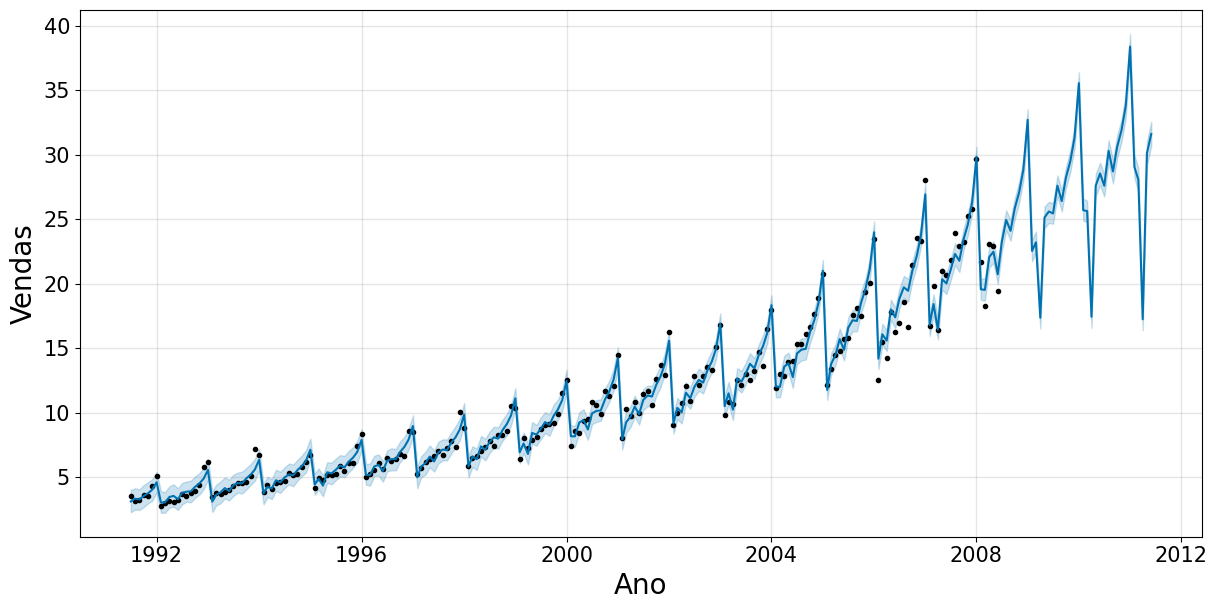

In [20]:
model.plot(predicions, figsize=(12, 6))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Vendas', fontsize=20)

In [21]:
mean_squared_error(df_drug['y'], predicions.loc[:203, 'yhat'])

0.41087723116358676

## Flexibilidade da sazionalidade

In [23]:
# Um valor alto desse parâmetro permite que 
# a sazonalidade se ajuste a grandes flutuações, 
# já um valor pequeno diminui a magnitude 
# da sazonalidade. pg. 57
model = Prophet(seasonality_mode='multiplicative', 
                seasonality_prior_scale=.01)

model.fit(df_drug)

df_future = model.make_future_dataframe(periods=36, freq='M')

predicions = model.predict(df_future)

predicions.head()

17:17:32 - cmdstanpy - INFO - Chain [1] start processing
17:17:32 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1991-07-01,3.214123,2.015407,4.328948,3.214123,3.214123,-0.008501,-0.008501,-0.008501,-0.008501,-0.008501,-0.008501,0.0,0.0,0.0,3.186798
1,1991-08-01,3.268811,2.256213,4.367681,3.268811,3.268811,0.007195,0.007195,0.007195,0.007195,0.007195,0.007195,0.0,0.0,0.0,3.292328
2,1991-09-01,3.323498,2.168452,4.402996,3.323498,3.323498,-0.018090,-0.018090,-0.018090,-0.018090,-0.018090,-0.018090,0.0,0.0,0.0,3.263375
3,1991-10-01,3.376422,2.408152,4.587922,3.376422,3.376422,0.031123,0.031123,0.031123,0.031123,0.031123,0.031123,0.0,0.0,0.0,3.481507
4,1991-11-01,3.431110,2.450231,4.790512,3.431110,3.431110,0.065573,0.065573,0.065573,0.065573,0.065573,0.065573,0.0,0.0,0.0,3.656099


Text(116.97222222222221, 0.5, 'Vendas')

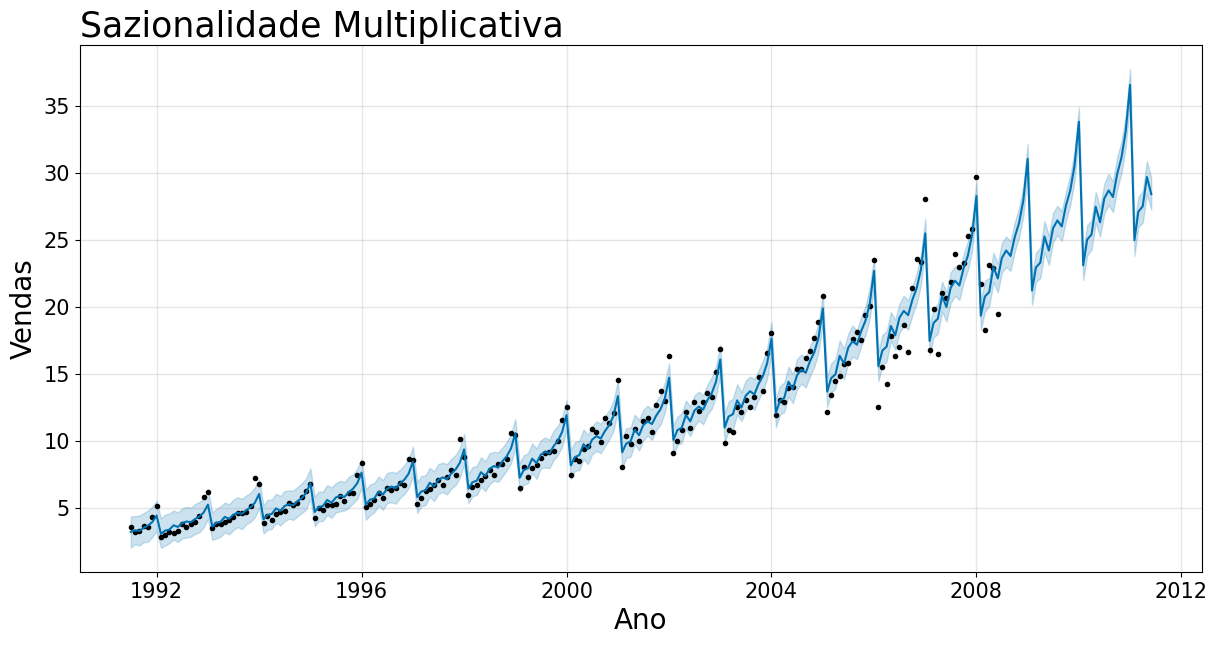

In [25]:
model.plot(predicions, figsize=(12, 6))

plt.title('Sazionalidade Multiplicativa', 
          loc='left', 
          fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Vendas', fontsize=20)

In [26]:
mean_squared_error(df_drug['y'], predicions.loc[:203, 'yhat'])

0.7436553891219151

## Séries de Fourier

> "As Séries de Fourier foram introduzidas por Jean Baptiste Joseph Fourier no início de 1800 para investigar a Teoria do calor. Uma Série de Fourier é a expansão de uma função periódica f(x) em termos de uma soma infinita de senos e cossenos. As Séries de Fourier fazem uso das relações de ortogonalidade das funções seno e cosseno. A aplicação da Série de Fourier é, portanto, uma análise harmônica extremamente útil para quebrar uma função periódica arbitrária em um conjunto de termos simples que podem ser conectados, resolvidos de forma individual e então recombinados para obter a solução de um problema. [...]" pg. 59

$$
1 = \sum_{n-odd}^{\infty}{\frac{4}{n \pi}\sin (n \pi x)}
$$

> "Segundo a documentação do Prophet, a Série de Fourier igual a 3 é adequada para sazonalidade semanal. Já quando trabalhamos com a sazonalidade anual, a Série de Fourier é igual a 10." pg. 62

17:26:51 - cmdstanpy - INFO - Chain [1] start processing
17:26:51 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


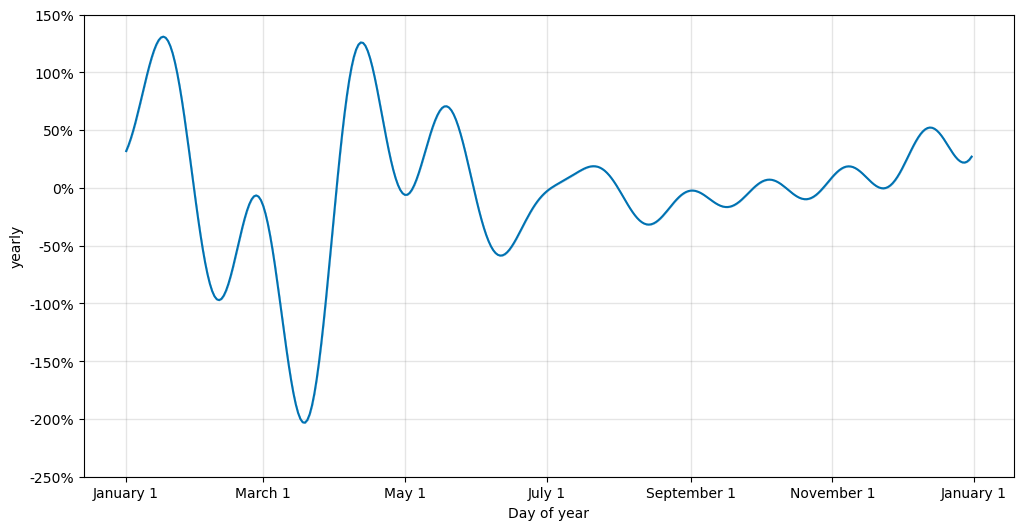

In [27]:
from prophet.plot import plot_yearly

model = Prophet(seasonality_mode='multiplicative')

model.fit(df_drug)

fig = plot_yearly(model, figsize=(12, 6))

17:27:45 - cmdstanpy - INFO - Chain [1] start processing
17:27:46 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


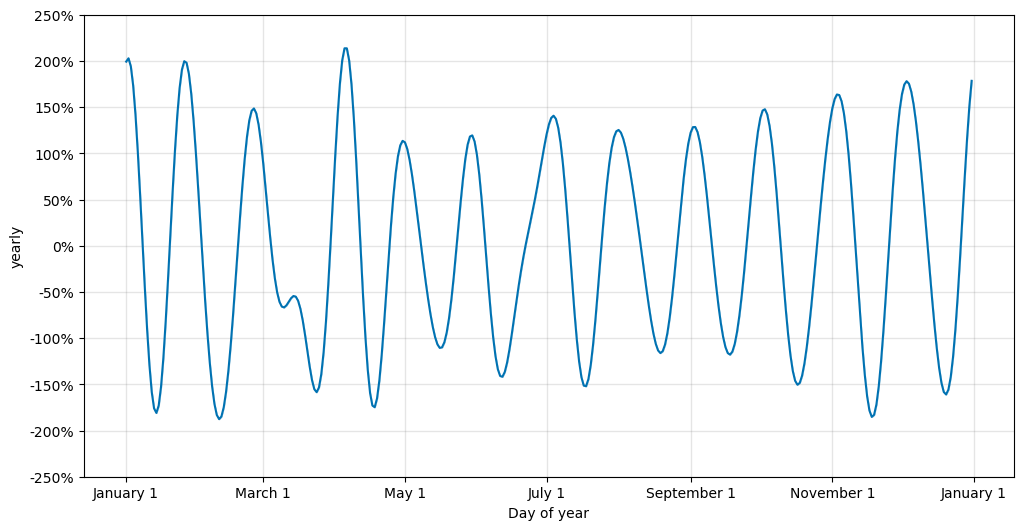

In [28]:
model = Prophet(yearly_seasonality=20, 
                seasonality_mode='multiplicative')

model.fit(df_drug)

fig = plot_yearly(model, figsize=(12, 6))

## Sazionalidades especificadas

In [30]:
CSV_URL_BIKE = 'https://github.com/allanspadini/livro-val-allan/blob/main/london_merged.csv?raw=true'

df_bike = pd.read_csv(CSV_URL_BIKE, parse_dates=['timestamp'])

df_bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [31]:
df = pd.DataFrame()

df['ds'] = df_bike['timestamp']
df['y'] = df_bike['cnt']

df.head()

,ds,y
0,2015-01-04 00:00:00,182
1,2015-01-04 01:00:00,138
2,2015-01-04 02:00:00,134
3,2015-01-04 03:00:00,72
4,2015-01-04 04:00:00,47


In [32]:
model = Prophet()

model.fit(df)

df_future = model.make_future_dataframe(periods=0)

predicions = model.predict(df_future)

predicions.head()

17:30:31 - cmdstanpy - INFO - Chain [1] start processing
17:30:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04 00:00:00,1158.005940,-1136.139915,651.751153,1158.005940,1158.005940,-1394.772449,-1394.772449,-1394.772449,-706.181543,-706.181543,-706.181543,-185.741602,-185.741602,-185.741602,-502.849304,-502.849304,-502.849304,0.0,0.0,0.0,-236.766509
1,2015-01-04 01:00:00,1158.003317,-1151.599770,657.295754,1158.003317,1158.003317,-1403.961823,-1403.961823,-1403.961823,-715.811321,-715.811321,-715.811321,-185.670202,-185.670202,-185.670202,-502.480300,-502.480300,-502.480300,0.0,0.0,0.0,-245.958506
2,2015-01-04 02:00:00,1158.000694,-1398.148818,394.665826,1158.000694,1158.000694,-1650.364578,-1650.364578,-1650.364578,-963.026819,-963.026819,-963.026819,-185.230605,-185.230605,-185.230605,-502.107154,-502.107154,-502.107154,0.0,0.0,0.0,-492.363884
3,2015-01-04 03:00:00,1157.998071,-1714.796246,96.733914,1157.998071,1157.998071,-1957.827170,-1957.827170,-1957.827170,-1271.665963,-1271.665963,-1271.665963,-184.431326,-184.431326,-184.431326,-501.729881,-501.729881,-501.729881,0.0,0.0,0.0,-799.829099
4,2015-01-04 04:00:00,1157.995448,-1803.016232,79.014687,1157.995448,1157.995448,-2006.521720,-2006.521720,-2006.521720,-1321.891911,-1321.891911,-1321.891911,-183.281310,-183.281310,-183.281310,-501.348499,-501.348499,-501.348499,0.0,0.0,0.0,-848.526271


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

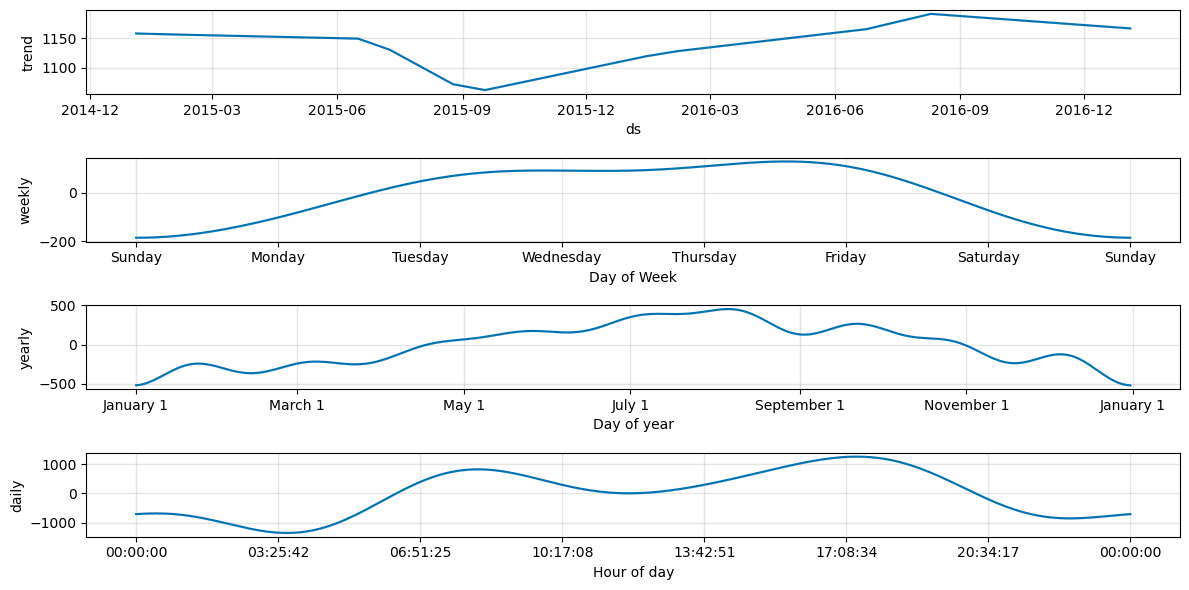

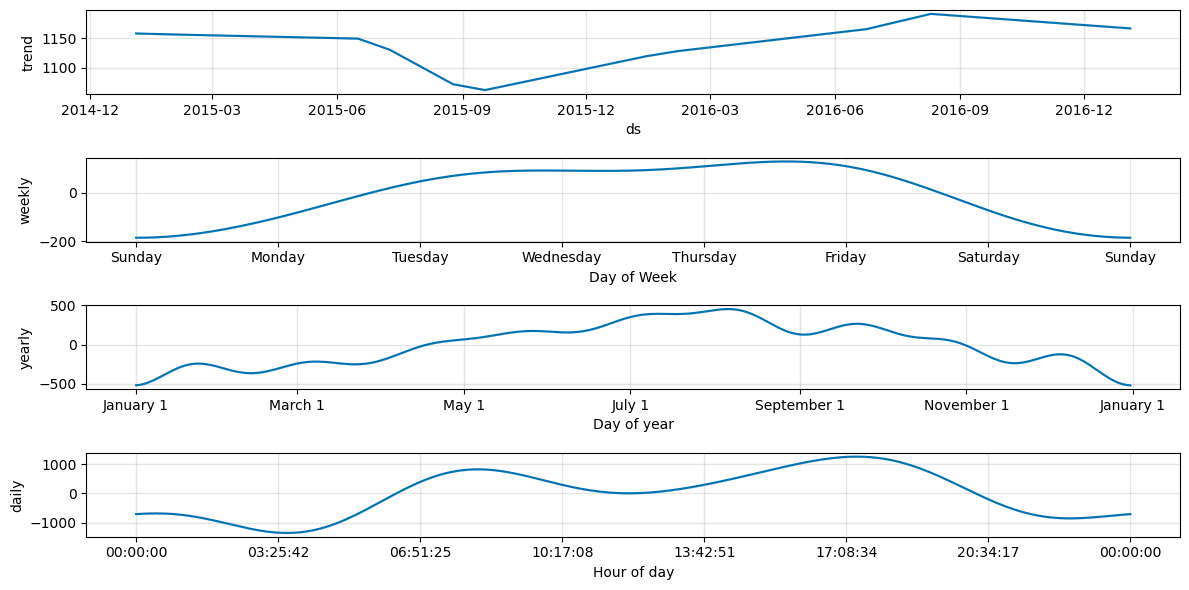

In [33]:
model.plot_components(predicions, figsize=(12, 6))

In [34]:
mean_squared_error(df['y'], predicions.loc[:, 'yhat'])

481532.659858315

In [35]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model.fit(df)

df_future = model.make_future_dataframe(periods=0)

predicions = model.predict(df_future)

predicions.head()

17:32:54 - cmdstanpy - INFO - Chain [1] start processing
17:32:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04 00:00:00,1152.016620,-671.549342,2051.753098,1152.016620,1152.016620,-497.586383,-497.586383,-497.586383,22.560105,22.560105,22.560105,-520.146488,-520.146488,-520.146488,0.0,0.0,0.0,654.430237
1,2015-01-04 01:00:00,1152.008075,-741.503121,1927.266822,1152.008075,1152.008075,-495.698885,-495.698885,-495.698885,24.010367,24.010367,24.010367,-519.709252,-519.709252,-519.709252,0.0,0.0,0.0,656.309190
2,2015-01-04 02:00:00,1151.999531,-615.577247,1984.591154,1151.999531,1151.999531,-493.810056,-493.810056,-493.810056,25.457752,25.457752,25.457752,-519.267808,-519.267808,-519.267808,0.0,0.0,0.0,658.189475
3,2015-01-04 03:00:00,1151.990986,-684.816149,2040.657147,1151.990986,1151.990986,-491.920731,-491.920731,-491.920731,26.901442,26.901442,26.901442,-518.822173,-518.822173,-518.822173,0.0,0.0,0.0,660.070255
4,2015-01-04 04:00:00,1151.982442,-667.854226,2048.046080,1151.982442,1151.982442,-490.031748,-490.031748,-490.031748,28.340616,28.340616,28.340616,-518.372364,-518.372364,-518.372364,0.0,0.0,0.0,661.950693


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

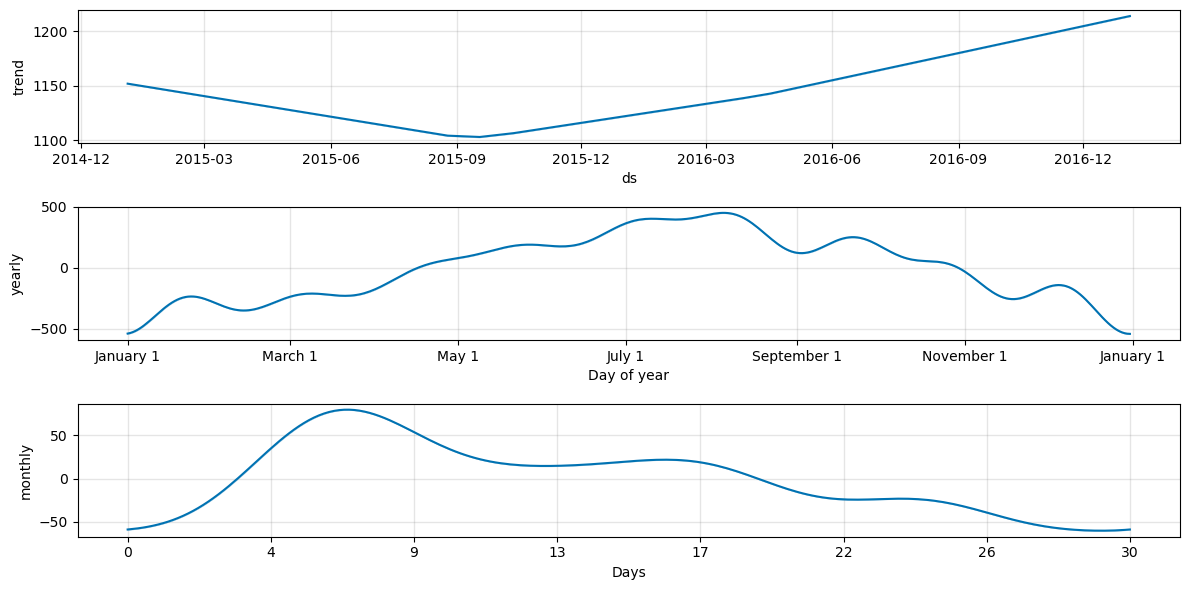

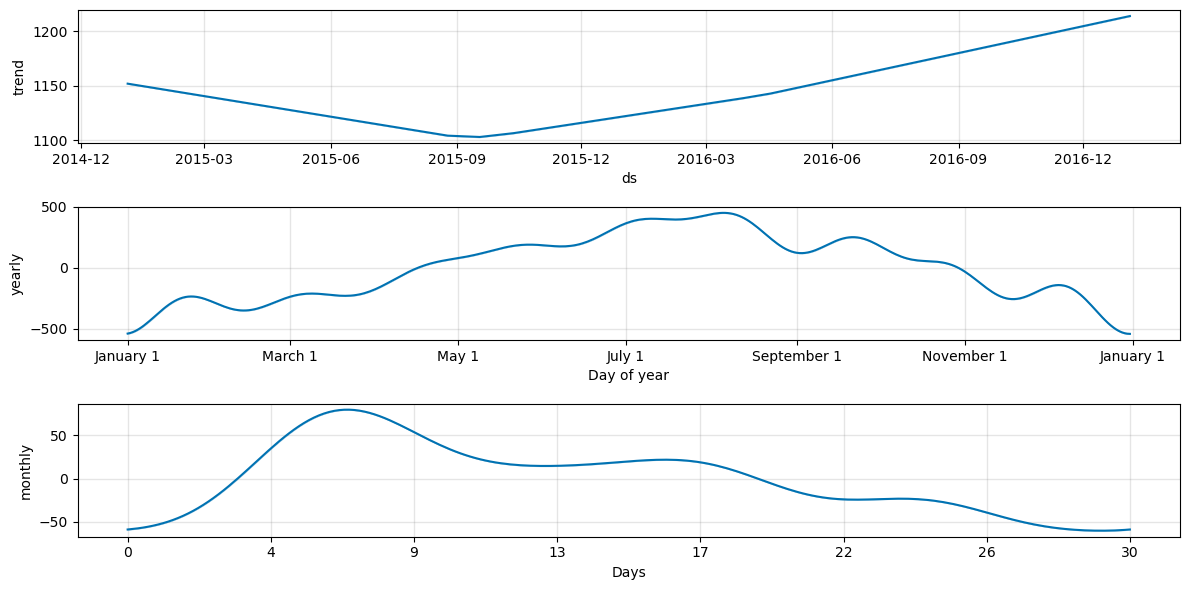

In [36]:
model.plot_components(predicions, figsize=(12, 6))

In [37]:
mean_squared_error(df['y'], predicions.loc[:, 'yhat'])

1104746.0192210267

In [38]:
model = Prophet(weekly_seasonality=False)

model.add_seasonality(name='daily', period=1, fourier_order=3)

model.fit(df)

df_future = model.make_future_dataframe(periods=0)

predicions = model.predict(df_future)

predicions.head()

17:34:42 - cmdstanpy - INFO - Chain [1] start processing
17:34:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04 00:00:00,1161.723720,-1071.198962,760.629686,1161.723720,1161.723720,-1290.351253,-1290.351253,-1290.351253,-780.072774,-780.072774,-780.072774,-510.278479,-510.278479,-510.278479,0.0,0.0,0.0,-128.627533
1,2015-01-04 01:00:00,1161.720827,-1154.418295,683.814078,1161.720827,1161.720827,-1403.257410,-1403.257410,-1403.257410,-893.345476,-893.345476,-893.345476,-509.911934,-509.911934,-509.911934,0.0,0.0,0.0,-241.536583
2,2015-01-04 02:00:00,1161.717934,-1328.333843,462.408389,1161.717934,1161.717934,-1576.264033,-1576.264033,-1576.264033,-1066.722852,-1066.722852,-1066.722852,-509.541181,-509.541181,-509.541181,0.0,0.0,0.0,-414.546099
3,2015-01-04 03:00:00,1161.715040,-1420.670929,315.731898,1161.715040,1161.715040,-1706.961233,-1706.961233,-1706.961233,-1197.794997,-1197.794997,-1197.794997,-509.166236,-509.166236,-509.166236,0.0,0.0,0.0,-545.246193
4,2015-01-04 04:00:00,1161.712147,-1430.917134,359.504017,1161.712147,1161.712147,-1652.946044,-1652.946044,-1652.946044,-1144.158929,-1144.158929,-1144.158929,-508.787115,-508.787115,-508.787115,0.0,0.0,0.0,-491.233897


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

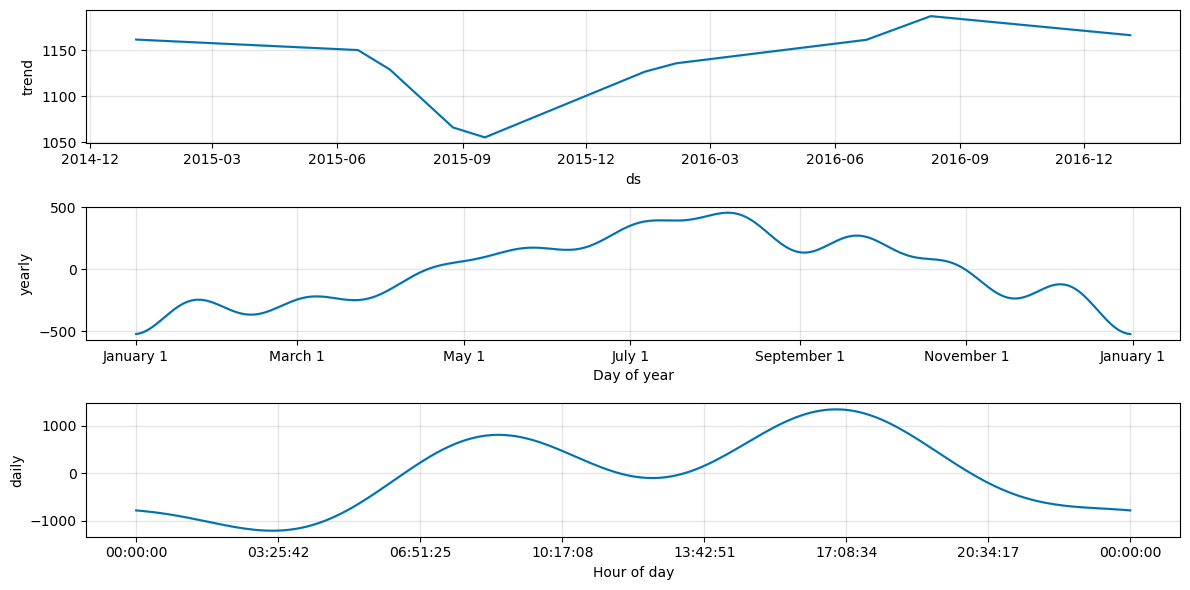

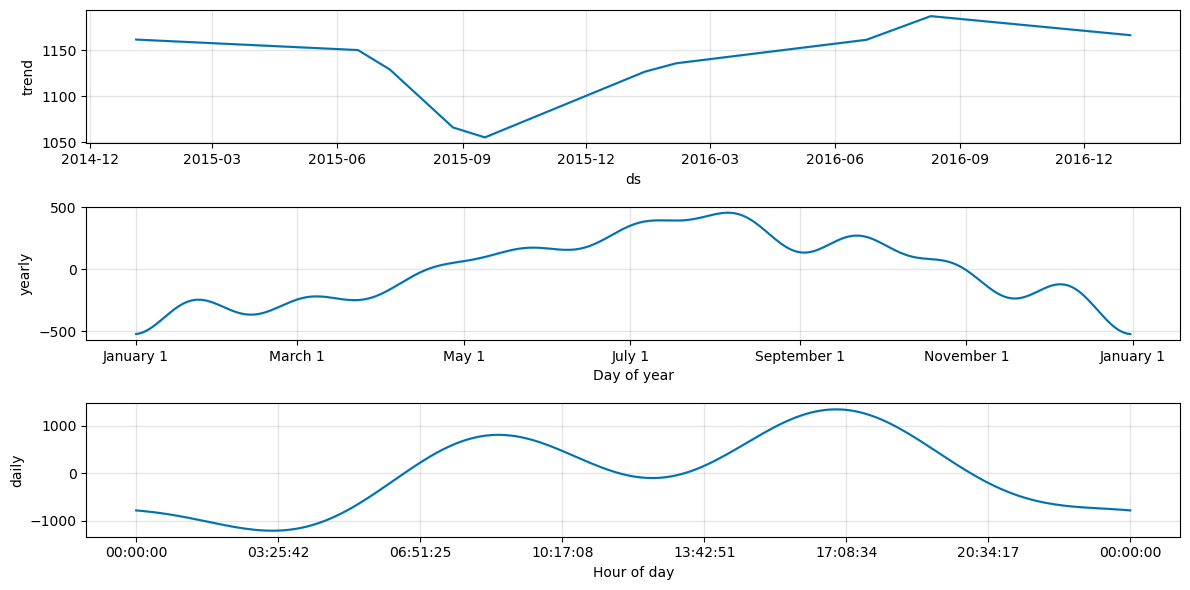

In [39]:
model.plot_components(predicions, figsize=(12, 6))

In [41]:
mean_squared_error(df['y'], predicions.loc[:, 'yhat'])

509478.2068481464

In [42]:
model = Prophet(weekly_seasonality=False)

model.add_seasonality(name='hourly', period=1/24, fourier_order=3)

model.fit(df)

df_future = model.make_future_dataframe(periods=0)

predicions = model.predict(df_future)

predicions.head()

17:36:53 - cmdstanpy - INFO - Chain [1] start processing
17:36:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,hourly,hourly_lower,hourly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04 00:00:00,424.097304,-991.002940,807.830912,424.097304,424.097304,-483.630015,-483.630015,-483.630015,-706.146723,-706.146723,-706.146723,726.544602,726.544602,726.544602,-504.027894,-504.027894,-504.027894,0.0,0.0,0.0,-59.532711
1,2015-01-04 01:00:00,424.096710,-965.789628,875.970694,424.096710,424.096710,-492.935179,-492.935179,-492.935179,-715.840792,-715.840792,-715.840792,726.544602,726.544602,726.544602,-503.638989,-503.638989,-503.638989,0.0,0.0,0.0,-68.838469
2,2015-01-04 02:00:00,424.096117,-1212.956313,616.671880,424.096117,424.096117,-739.733939,-739.733939,-739.733939,-963.032657,-963.032657,-963.032657,726.544602,726.544602,726.544602,-503.245884,-503.245884,-503.245884,0.0,0.0,0.0,-315.637822
3,2015-01-04 03:00:00,424.095523,-1573.670651,294.145444,424.095523,424.095523,-1047.926528,-1047.926528,-1047.926528,-1271.622535,-1271.622535,-1271.622535,726.544602,726.544602,726.544602,-502.848595,-502.848595,-502.848595,0.0,0.0,0.0,-623.831005
4,2015-01-04 04:00:00,424.094930,-1588.995216,296.211769,424.094930,424.094930,-1097.757660,-1097.757660,-1097.757660,-1321.855123,-1321.855123,-1321.855123,726.544602,726.544602,726.544602,-502.447139,-502.447139,-502.447139,0.0,0.0,0.0,-673.662730


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

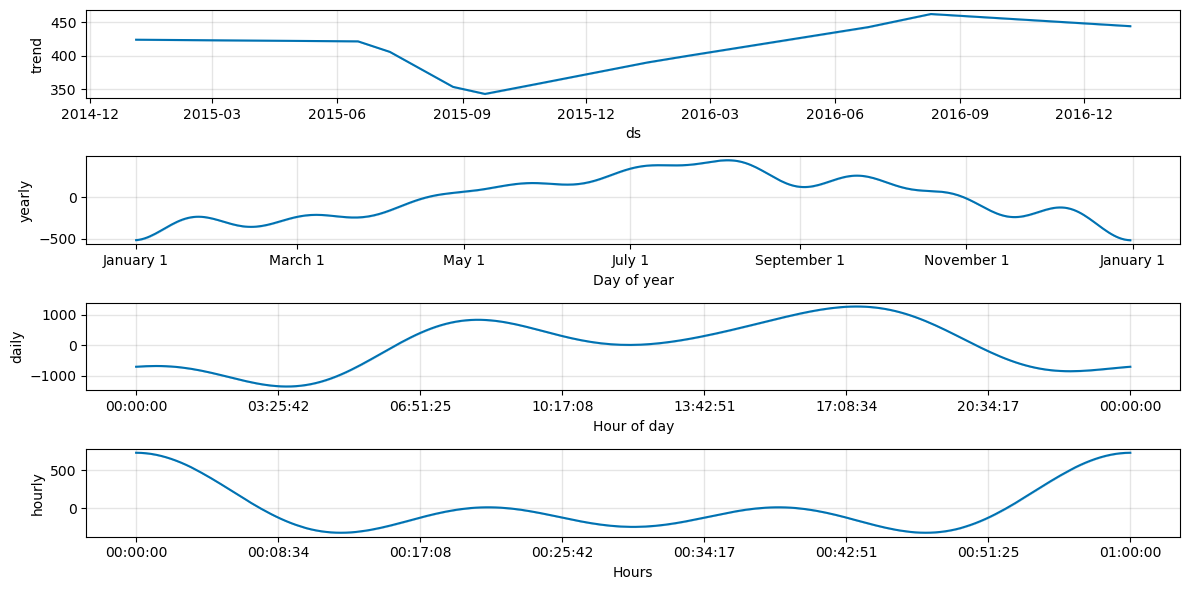

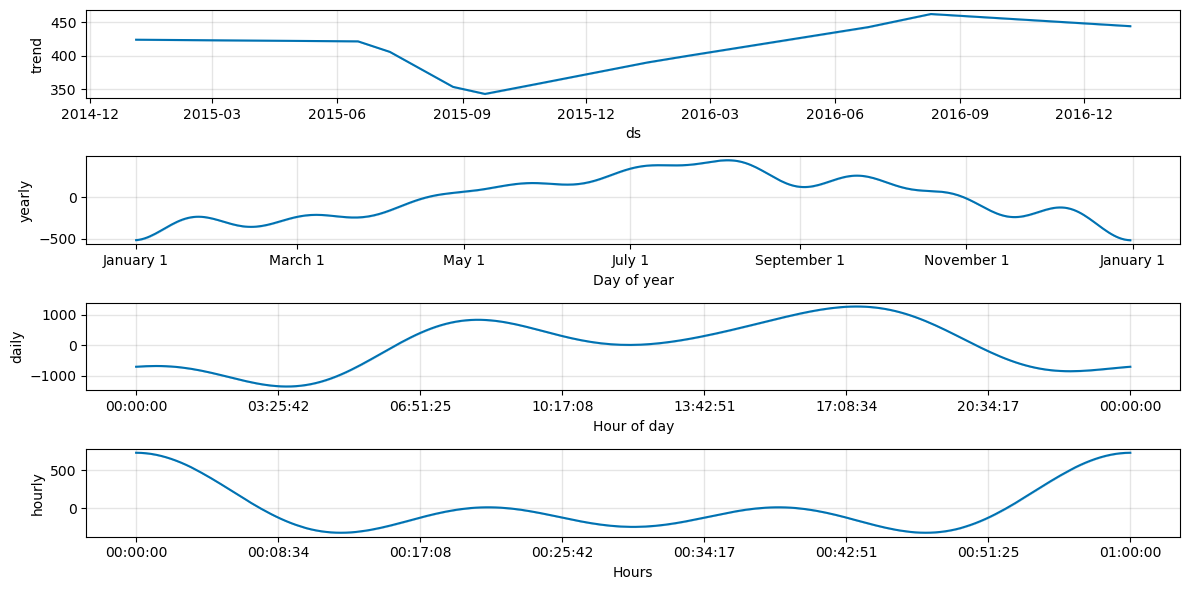

In [43]:
model.plot_components(predicions, figsize=(12, 6))

In [45]:
mean_squared_error(df['y'], predicions.loc[:, 'yhat'])

493782.8284232499